# Exploratory Data Analysis - Star Wars Survey Data

In this project, we will try to answer the following questions related to the Star Wars survey data:
- Are there more Star Wars fans vs non-fans among the respondents of this survey?
- Do male and female respondents show different levels of fandom?
- What is the most (and least) popular films of the Star Wars franchise?
- Are there specific age groups that Star Wars fans (or not) belong to?
- Who are the most (and least) favorite characters in the Star Wars universe according to respondents?
- Are Star Wars fans also Star Trek fans?

In addition, we will also include visualizations using matplotlib.

## Download Data and Import Libraries
Download Star Wars data:
- **Download zip file:** https://www.kaggle.com/datasets/samaxtech/star-wars-survey-data/data
- **Using cURL:** curl -L -o ~/Downloads/star-wars-survey-data.zip https://www.kaggle.com/api/v1/datasets/download/samaxtech/star-wars-survey-data

Import necessary libraries for project and specify settings for visualizations.

In [1]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## settings for visuals
pd.set_option('display.max_columns', None)
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=['#2364AA', '#3DA5D9', '#73BFB8', '#FEC601', '#EA7317'])  # global color cycle

## Data Cleaning & Transformation

In [2]:
## read dataset
starwars = pd.read_csv('StarWars.csv')
starwars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?��,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Looking at the first 5 rows of the dataset, some of the column names are very long and not meaningful.

The first row of the dataset also contains information that should be combined with the headers.

We want to clean up the column names to make them more readable and more meaningful.

In [3]:
## clean up column names
starwars = starwars.rename(columns={
    'Have you seen any of the 6 films in the Star Wars franchise?':'watched at least one',
    'Do you consider yourself to be a fan of the Star Wars film franchise?':'sw fan',
    'Which of the following Star Wars films have you seen? Please select all that apply.':'seen, episode 1',
    'Unnamed: 4':'seen, episode 2',
    'Unnamed: 5':'seen, episode 3',
    'Unnamed: 6':'seen, episode 4',
    'Unnamed: 7':'seen, episode 5',
    'Unnamed: 8':'seen, episode 6',
    'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'rank, episode 1',
    'Unnamed: 10':'rank, episode 2',
    'Unnamed: 11':'rank, episode 3',
    'Unnamed: 12':'rank, episode 4',
    'Unnamed: 13':'rank, episode 5',
    'Unnamed: 14':'rank, episode 6',
    'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'Han Solo',
    'Unnamed: 16':'Luke Skywalker',
    'Unnamed: 17':'Princess Leia Organa',
    'Unnamed: 18':'Anakin Skywalker',
    'Unnamed: 19':'Obi Wan Kenobi',
    'Unnamed: 20':'Emperor Palpatine',
    'Unnamed: 21':'Darth Vader',
    'Unnamed: 22':'Lando Calrissian',
    'Unnamed: 23':'Boba Fett',
    'Unnamed: 24':'C-3P0',
    'Unnamed: 25':'R2 D2',
    'Unnamed: 26':'Jar Jar Binks',
    'Unnamed: 27':'Padme Amidala',
    'Unnamed: 28':'Yoda',
    'Which character shot first?':'shot first',
    'Are you familiar with the Expanded Universe?':'expanded universe',
    starwars.columns.values[-7]:'expanded universe fan',
    'Do you consider yourself to be a fan of the Star Trek franchise?':'star trek fan'
    })

In [4]:
## review updated column names
starwars.columns

Index(['RespondentID', 'watched at least one', 'sw fan', 'seen, episode 1',
       'seen, episode 2', 'seen, episode 3', 'seen, episode 4',
       'seen, episode 5', 'seen, episode 6', 'rank, episode 1',
       'rank, episode 2', 'rank, episode 3', 'rank, episode 4',
       'rank, episode 5', 'rank, episode 6', 'Han Solo', 'Luke Skywalker',
       'Princess Leia Organa', 'Anakin Skywalker', 'Obi Wan Kenobi',
       'Emperor Palpatine', 'Darth Vader', 'Lando Calrissian', 'Boba Fett',
       'C-3P0', 'R2 D2', 'Jar Jar Binks', 'Padme Amidala', 'Yoda',
       'shot first', 'expanded universe', 'expanded universe fan',
       'star trek fan', 'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
      dtype='object')

In [5]:
starwars.shape

(1187, 38)

Looking at the shape of the dataset, there are a total of 1,187 responders and 37 questions / features (38 columns - 1 ID column).

Since we have combined the first row with the column headers, the first row is no longer needed and we can drop it.

We use `.head()` to look at the first 5 rows of the cleaned data.

In [6]:
## drop first row
starwars_cleaned = starwars.loc[1:].copy()
starwars_cleaned.head()

,RespondentID,watched at least one,sw fan,"seen, episode 1","seen, episode 2","seen, episode 3","seen, episode 4","seen, episode 5","seen, episode 6","rank, episode 1","rank, episode 2","rank, episode 3","rank, episode 4","rank, episode 5","rank, episode 6",Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,shot first,expanded universe,expanded universe fan,star trek fan,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Instead of having the film titles in each response representing the film that they have seen, we can further clean the dataset to specify "Yes" if they have seen the film and "No" otherwise.

In [7]:
## replace values in "seen" columns to 'Yes' or 'No'
for col in starwars_cleaned.columns[3:9]:
    starwars_cleaned.loc[:, col] = starwars_cleaned[col].notna().map({True:'Yes', False:'No'})
    
starwars_cleaned.head()

,RespondentID,watched at least one,sw fan,"seen, episode 1","seen, episode 2","seen, episode 3","seen, episode 4","seen, episode 5","seen, episode 6","rank, episode 1","rank, episode 2","rank, episode 3","rank, episode 4","rank, episode 5","rank, episode 6",Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,shot first,expanded universe,expanded universe fan,star trek fan,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Yes,Yes,Yes,No,No,No,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


We can take a look at the general information of the dataframe features using the `.info()` method.

In [18]:
print(starwars_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 1 to 1186
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RespondentID              1186 non-null   float64
 1   watched at least one      1186 non-null   object 
 2   sw fan                    836 non-null    object 
 3   seen, episode 1           1186 non-null   object 
 4   seen, episode 2           1186 non-null   object 
 5   seen, episode 3           1186 non-null   object 
 6   seen, episode 4           1186 non-null   object 
 7   seen, episode 5           1186 non-null   object 
 8   seen, episode 6           1186 non-null   object 
 9   rank, episode 1           835 non-null    object 
 10  rank, episode 2           836 non-null    object 
 11  rank, episode 3           835 non-null    object 
 12  rank, episode 4           836 non-null    object 
 13  rank, episode 5           836 non-null    object 
 14  rank, ep

We can see that all features are of the type `object` except for `RespondentID` which is of the type `float64`.

## Data Exploration

### What proportion of respondents watched at least 1 film from the franchise?

In [10]:
print(starwars_cleaned.iloc[:, 1].value_counts())

Yes    936
No     250
Name: watched at least one, dtype: int64


Of the 1,186 survey respondents, 936 (~79%) have seen at least 1 film from the Star Wars franchise.

### How many respondents consider themselves a fan?

In [11]:
starwars_cleaned[starwars_cleaned['watched at least one']=='Yes']['sw fan'].fillna('N/A').value_counts()

Yes    552
No     284
N/A    100
Name: sw fan, dtype: int64

552 of the 936 respondents who watched at least 1 film from the franchise consider themselves a Star Wars fan.

284 of the 936 respondents don't consider themselves a fan, and 100 of them did not answer the question.

As a sanity check, we see that there are no respondents who have not seen any film, who consider themselves a fan.

In [18]:
starwars_cleaned[(starwars_cleaned['watched at least one']=='No') & (starwars_cleaned['sw fan']=='Yes')].shape[0]

0

We take a look at the proportion of respondents who watched at least one film from the franchise against the proportion of those who consider themselves fans.

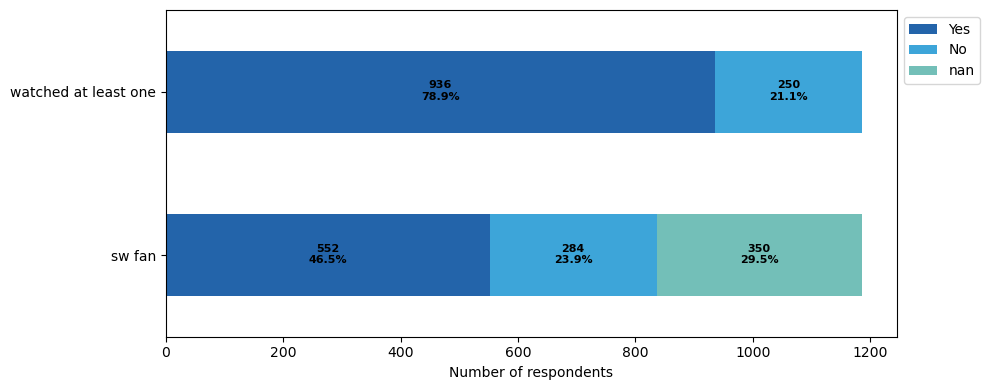

In [21]:
watched_fan_cnt = starwars_cleaned[['watched at least one', 'sw fan']]\
    .apply(lambda x: x.value_counts(dropna=False))\
    .transpose()\
    .sort_index()

## plot bar chart
ax = watched_fan_cnt.plot.barh(stacked=True, figsize=(10,4))
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.xlabel('Number of respondents')

## include data labels for each bar
for i, idx in enumerate(watched_fan_cnt.index):
    total = watched_fan_cnt.loc[idx].sum()
    cumulative = 0
    for col in watched_fan_cnt.columns:
        x_val = watched_fan_cnt.loc[idx, col]
        prop = x_val / total
        if pd.notna(x_val):
            plt.text(
                x=x_val + cumulative - (x_val / 2),
                y=i-.05,
                s=f'{int(x_val)}\n{np.round(prop * 100, 1)}%',
                color='black',
                fontsize=8,
                fontweight='bold',
                ha='center'
            )
        cumulative += x_val

plt.tight_layout()
plt.show()


The bar chart confirms what we observed in our above analysis:
- All respondents answered either 'Yes' or 'No' to the first question, about 79% have seen at least 1 film from the franchise.
- About 47% of respondents consider themselves Star Wars fans.
- About 100 respondents who watched at least 1 film did not answer the question of whether they would consider themselves a fan.

### Proportion of respondents by gender

In [23]:
starwars_cleaned['Gender'].value_counts(normalize=True)

Female    0.524857
Male      0.475143
Name: Gender, dtype: float64

About 52% of respondents were female and 48% were male.

We look at the proportion of respondents who watched at least one film by gender.

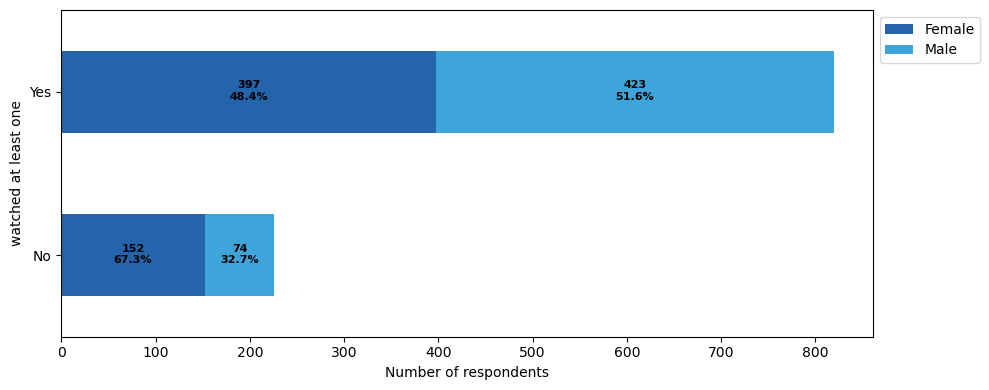

In [27]:
watched_gender = pd.crosstab(starwars_cleaned['watched at least one'], starwars_cleaned['Gender'])

# plot bar chart
ax = watched_gender.plot.barh(stacked=True, figsize=(10,4))
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.set_xlabel('Number of respondents')

## include data labels for each bar
for i, idx in enumerate(watched_gender.index):
    total = watched_gender.loc[idx].sum()
    cumulative = 0
    for col in watched_gender.columns:
        x_val = watched_gender.loc[idx, col]
        prop = x_val / total
        if pd.notna(x_val):
            plt.text(
                x=x_val + cumulative - (x_val / 2),
                y=i-.05,
                s=f'{int(x_val)}\n{np.round(prop * 100, 1)}%',
                color='black',
                fontsize=8,
                fontweight='bold',
                ha='center'
            )
        cumulative += x_val

plt.tight_layout()
plt.show()

From the above visualization, we see that there are more males who have watched at least one film from the franchise (~52%).

Similarly, we look at the proportion of respondents who consider themselves a fan by gender.

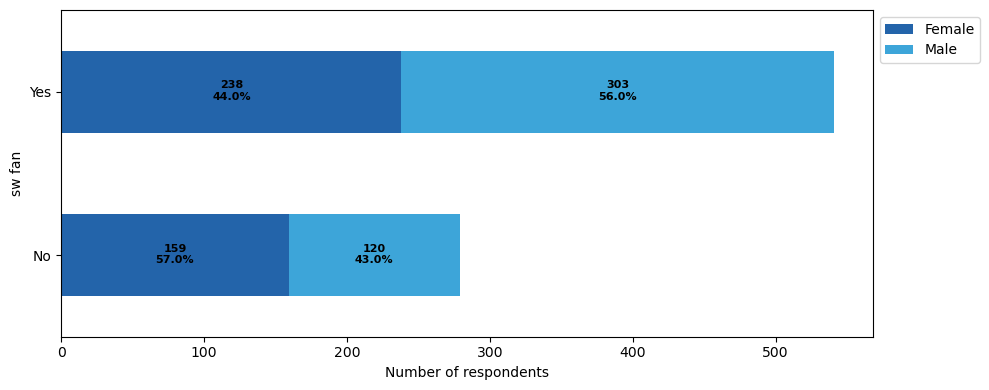

In [28]:
fan_gender = pd.crosstab(starwars_cleaned['sw fan'], starwars_cleaned['Gender'])

# plot bar chart
ax = fan_gender.plot.barh(stacked=True, figsize=(10,4))
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.set_xlabel('Number of respondents')

## include data labels for each bar
for i, idx in enumerate(fan_gender.index):
    total = fan_gender.loc[idx].sum()
    cumulative = 0
    for col in fan_gender.columns:
        x_val = fan_gender.loc[idx, col]
        prop = x_val / total
        if pd.notna(x_val):
            plt.text(
                x=x_val + cumulative - (x_val / 2),
                y=i-.05,
                s=f'{int(x_val)}\n{np.round(prop * 100, 1)}%',
                color='black',
                fontsize=8,
                fontweight='bold',
                ha='center'
            )
        cumulative += x_val

plt.tight_layout()
plt.show()

From the chart, we see that more males (~56%) consider themselves to be a fan of the Star Wars franchise.

### Respondents who watched at least one film across age groups

In [97]:
pd.crosstab(starwars_cleaned['watched at least one'].fillna('NA'), starwars_cleaned['Age'].fillna('NA'), normalize=True)

Age,18-29,30-44,45-60,> 60,NA
watched at least one,,,,,
No,0.032040,0.051433,0.043002,0.064081,0.020236
Yes,0.151771,0.174536,0.202361,0.162732,0.097808


We see that those who did not provide a response for their age group was the least within their respective groups - watched at least 1 film (~2%) vs did not (~10%).

For the following section, we look at the respondents who provided their age group in their responses.

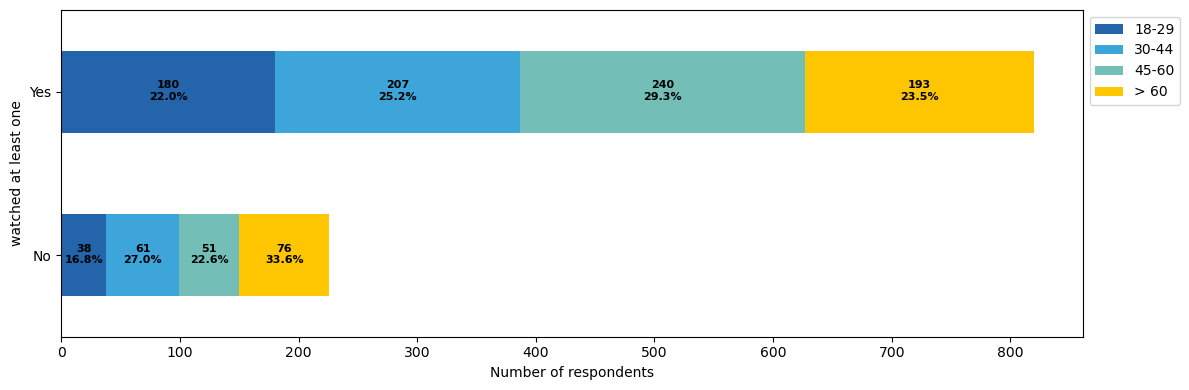

In [98]:
# use dropna to drop rows that did not have age question answered
watched_age = pd.crosstab(starwars_cleaned.dropna(subset=['Age'])['watched at least one'], starwars_cleaned.dropna(subset=['Age'])['Age'])

# plot bar chart
ax = watched_age.plot.barh(stacked=True, figsize=(12,4))
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.set_xlabel('Number of respondents')

## include data labels for each bar
for i, idx in enumerate(watched_age.index):
    total = watched_age.loc[idx].sum()
    cumulative = 0
    for col in watched_age.columns:
        x_val = watched_age.loc[idx, col]
        prop = x_val / total
        if pd.notna(x_val):
            plt.text(
                x=x_val + cumulative - (x_val / 2),
                y=i-.05,
                s=f'{int(x_val)}\n{np.round(prop * 100, 1)}%',
                color='black',
                fontsize=8,
                fontweight='bold',
                ha='center'
            )
        cumulative += x_val

plt.tight_layout()
plt.show()

We can see that
- the 45-60 year old age group had the highest proportion of respondents who watched at least one film from the franchise.
- those older than 60 years old made up the largest proportion of respondents who did not watch any film from the franchise.

### Exploring film rankings

For this section, we look at respondents who have watched all 6 of the franchise's films for a more unbiased comparison.

*Note: According to the dataset, rank 1 = best, rank 6 = worst.*

In [33]:
rank_df = starwars_cleaned[['rank, episode 1', 'rank, episode 2', 'rank, episode 3', 'rank, episode 4', 'rank, episode 5', 'rank, episode 6']]\
    .dropna() # drop rows with NA i.e. respondents who did not watch all 6 films
rank_df.head()

,"rank, episode 1","rank, episode 2","rank, episode 3","rank, episode 4","rank, episode 5","rank, episode 6"
1,3,2,1,4,5,6
3,1,2,3,4,5,6
4,5,6,1,2,4,3
5,5,4,6,2,1,3
6,1,4,3,6,5,2


We take the average ranks given to each of the 6 films.

In [34]:
avg_rank = rank_df.astype(int).apply(np.mean, axis=0).sort_index(ascending=False)
avg_rank

rank, episode 6    3.046763
rank, episode 5    2.511990
rank, episode 4    3.269784
rank, episode 3    4.344125
rank, episode 2    4.091127
rank, episode 1    3.736211
dtype: float64

We display the average ranks in a bar chart for better visualization.

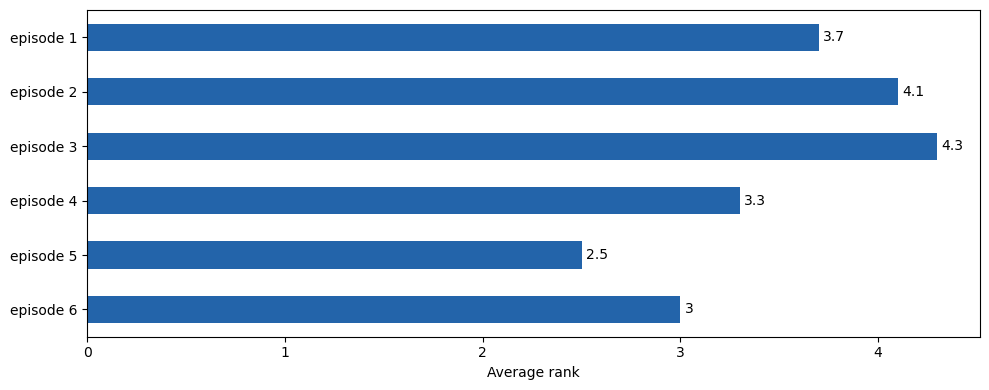

In [49]:
ax = avg_rank.apply(lambda x: np.round(x, 1)).plot.barh(figsize=(10,4))
ax.set_yticklabels(['episode 6', 'episode 5', 'episode 4', 'episode 3', 'episode 2', 'episode 1']) # rename tick labels for clarity
ax.set_xlabel('Average rank')

for container in ax.containers:
    ax.bar_label(container, padding=3)

plt.tight_layout()
plt.show()

Here, we can see that episode 5 (Star Wars: Episode V The Empire Strikes Back) was on average the best ranked film of the franchise. On the contrary, episode 3 (Star Wars: Episode III Revenge of the Sith) was the worst ranked film of the franchise, amongst the respondents of the survey.

Overall, the original trilogy (episodes 4 - 6) had a better overall rank compared to the prequels (episodes 1 - 3).

We can also look at the average ranks split by gender.

In [100]:
rank_gender = starwars_cleaned[['rank, episode 1', 'rank, episode 2', 'rank, episode 3', 'rank, episode 4', 'rank, episode 5', 'rank, episode 6', 'Gender']]\
    .dropna(subset=['rank, episode 1', 'rank, episode 2', 'rank, episode 3', 'rank, episode 4', 'rank, episode 5', 'rank, episode 6']) # drop rows with NA i.e. respondents who did not watch all 6 films
rank_gender[['rank, episode 1', 'rank, episode 2', 'rank, episode 3', 'rank, episode 4', 'rank, episode 5', 'rank, episode 6']] = rank_gender[['rank, episode 1', 'rank, episode 2', 'rank, episode 3', 'rank, episode 4', 'rank, episode 5', 'rank, episode 6']].astype(int)
rank_gender.head()

,"rank, episode 1","rank, episode 2","rank, episode 3","rank, episode 4","rank, episode 5","rank, episode 6",Gender
1,3,2,1,4,5,6,Male
3,1,2,3,4,5,6,Male
4,5,6,1,2,4,3,Male
5,5,4,6,2,1,3,Male
6,1,4,3,6,5,2,Male


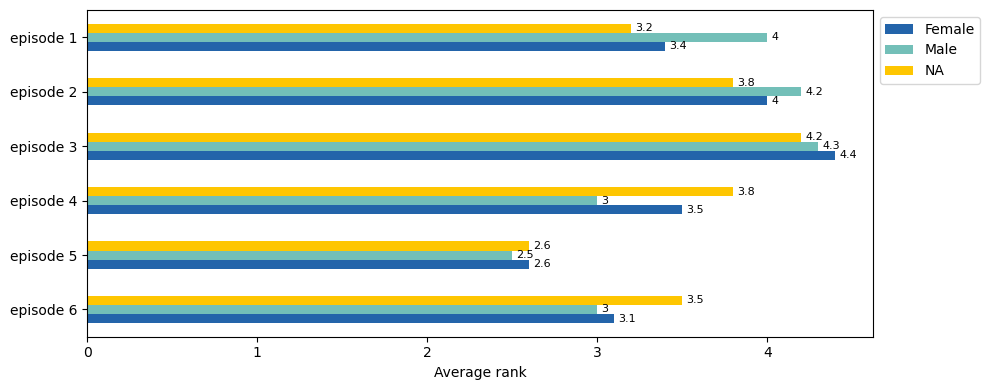

In [108]:
rank_gender_df = rank_gender.fillna('NA').melt(id_vars=['Gender'], var_name='episode', value_name='rank')\
    .pivot_table(values='rank', columns='episode', index='Gender', aggfunc=lambda x: np.round(np.mean(x), 1))\
    .transpose()\
    .sort_index(ascending=False)

ax = rank_gender_df.plot.barh(figsize=(10,4), color=['#2364AA', '#73BFB8', '#FEC601'])
ax.set_xlabel('Average rank')
ax.legend(loc='upper left', bbox_to_anchor=(1,1))
ax.set_yticklabels(['episode 6', 'episode 5', 'episode 4', 'episode 3', 'episode 2', 'episode 1']) # rename tick labels for clarity
ax.set_ylabel('')

for container in ax.containers:
    ax.bar_label(container, padding=3, fontsize=8)

plt.tight_layout()
plt.show()


We can see that, on average, for the original trilogy (episodes 4 - 6), they were ranked more favorably (lower rank) by the males than by the females.

On the other hand, the prequels (episodes 1 - 3), on average were ranked less favorably by the males than by the females.

Among those who did not wish to reveal their gender, they ranked (on average) the original trilogy better (lower rank) than the prequel trilogy.

### Exploring character rankings

In this section, we look at the respondents' favorability rankings of some Star Wars characters.

For the purpose of this exploration, we will group 'Very favorably' and 'Somewhat favorably' as 'Favorable' and 'Somewhat unfavorably' and 'Very unfavorably' as 'Unfavorable'.

In [85]:
# drop na for more unbiased comparison i.e. respondents who are familiar with all characters
pivot_df = starwars_cleaned.iloc[:, 15:29].dropna()\
    .apply(lambda col: col.map({'Very favorably':'Favorable',
                                'Somewhat favorably':'Favorable',
                                'Neither favorably nor unfavorably (neutral)':'Neutral',
                                'Somewhat unfavorably':'Unfavorable',
                                'Very unfavorably':'Unfavorable'}))\
    .melt(var_name='character', value_name='favorability ranking')\
    .pivot_table(index='character', columns='favorability ranking', aggfunc='size')

pivot_df


favorability ranking,Favorable,Neutral,Unfavorable
character,,,
Anakin Skywalker,481,118,115
Boba Fett,280,228,128
C-3P0,645,74,28
Darth Vader,448,74,229
Emperor Palpatine,241,193,180
Han Solo,699,40,7
Jar Jar Binks,221,149,291
Lando Calrissian,345,219,65
Luke Skywalker,705,36,13


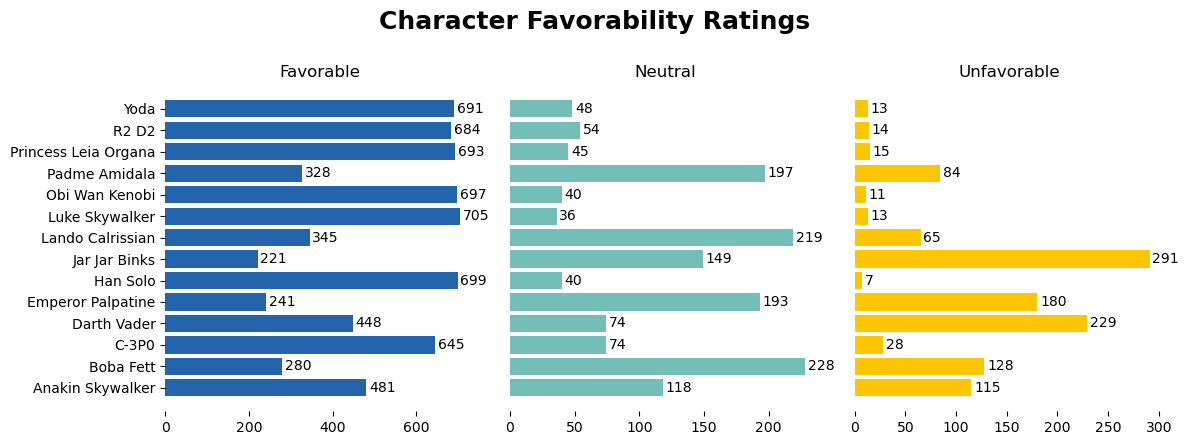

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))
fig.subplots_adjust(wspace=0.1)

## loop through each preference
colors = ['#2364AA', '#73BFB8', '#FEC601']
for (i, pref), col in zip(enumerate(pivot_df.columns), colors):
    bars = axs[i].barh(pivot_df.index, pivot_df[pref], color=col)
    axs[i].set_title(pref)

    if pref != 'Favorable':
        axs[i].set_yticks([])
        axs[i].set_yticklabels([])
    axs[i].bar_label(bars, padding=2)

# loop through all subplots and remove the borders (spines)
for ax in axs.flatten():  # flatten in case of multiple subplots - can use `for ax in axs` if only 1 row
    for spine in ax.spines.values():  # loop through all four spines
        spine.set_visible(False)  # hide the border

plt.tight_layout()
plt.suptitle('Character Favorability Ratings', fontsize=18, fontweight='bold', y=1.1)
plt.show()



From the chart above, we can see that:
- Luke Skywalker, Han Solo and Obi Wan were the most favorable amongst respondents
- Jar Jar Binks was the least favorable amongst respondents, and surprisingly favored less than villains Emperor Palpatine and Darth Vader

### Are Star Wars fans also Star Trek fans?

In [92]:
pd.crosstab(starwars_cleaned['sw fan'], starwars_cleaned['star trek fan'])

star trek fan,No,Yes
sw fan,,
No,238,45
Yes,175,370


From the responses, those who are Star Wars fans are likely also Star Trek fans (370 respondents).